In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.model_selection import cross_validate, cross_val_score, ShuffleSplit, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost.sklearn import XGBClassifier

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

%matplotlib inline

D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_csv(r'G:\2019.6.3\data_final\1\VA_1_b.csv')
data_valid = pd.read_csv(r'G:\2019.6.3\data_final\1\valid_VA_1_b.csv')
data.sort_values("VA 1M", inplace=True)

test_X = {}
test_y = {}
X = {}
y = {}
folds = 10

for i in range(folds):
    test_idx = [x+i for x in range(0, len(data), folds) if x+i < len(data)]
    train_idx = [i for i in range(len(data))]
    for j in test_idx: train_idx.remove(j)
    
    test_X[i] = data.iloc[test_idx, 1:-1]
    test_y[i] = data.iloc[test_idx, -1]
    X[i] = data.iloc[train_idx, 1:-1]
    y[i] = data.iloc[train_idx, -1]
    
X_all = data.iloc[:, 1:-1]
y_all = data.iloc[:, -1]

valid_X = data_valid.iloc[:, 1:-1]
valid_y = data_valid.iloc[:, -1]

## Feature Engineering

In [3]:
for i in range(folds):
    X[i].sort_index(inplace=True)
    y[i].sort_index(inplace=True)
    test_X[i].sort_index(inplace=True)
    test_y[i].sort_index(inplace=True)

    X[i] = np.log1p(X[i])
    y[i] = np.log1p(y[i])
    test_X[i] = np.log1p(test_X[i])
    
valid_X.sort_index(inplace=True)
valid_X = np.log1p(valid_X)

X_all.sort_index(inplace=True)
X_all = np.log1p(X_all)
y_all.sort_index(inplace=True)
y_all = np.log1p(y_all)

In [4]:
def Print_MAE_RMSE(test_y, pred_y):
    MAE = np.mean(np.abs(test_y - pred_y))
    RMSE = np.sqrt(np.mean((test_y - pred_y)**2))
    print('MAE = {:.4f}' .format(MAE))
    print('RMSE = {:.4f}' .format(RMSE))
    return MAE, RMSE

In [5]:
def Plot_Feature_Importance(feature_importance):
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=(6, 8))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X[0].columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

### Lasso Regressor

MAE = 0.0574
RMSE = 0.0744
MAE = 0.0839
RMSE = 0.1096
MAE = 0.0635
RMSE = 0.0964
MAE = 0.0566
RMSE = 0.0828
MAE = 0.0638
RMSE = 0.0852
MAE = 0.0651
RMSE = 0.0943
MAE = 0.0461
RMSE = 0.0585
MAE = 0.0575
RMSE = 0.0748
MAE = 0.0543
RMSE = 0.0702
MAE = 0.0444
RMSE = 0.0608
----------
MAE_mean = 0.0593
RMSE_mean = 0.0807


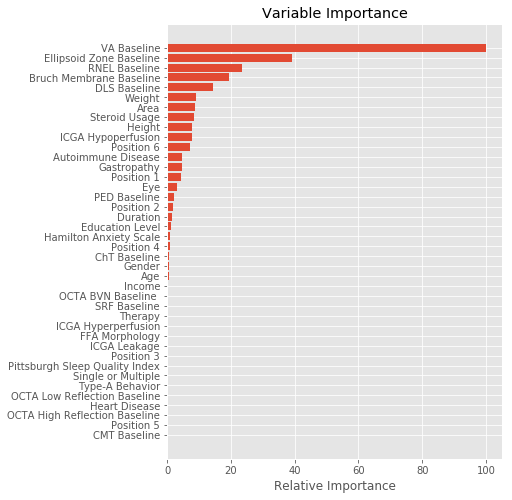

In [6]:
lasso = Lasso(alpha=0.0001, normalize=True, max_iter=1e6, random_state=0)
lasso_pred = []
lasso_mae = []
lasso_rmse = []
lasso_FI = 0

for i in range(folds):
    lasso.fit(X[i], y[i])
    lasso_pred0 = lasso.predict(test_X[i])
    lasso_pred1 = np.expm1(lasso_pred0)
    lasso_pred.append(lasso_pred1)
    
    MAE, RMSE = Print_MAE_RMSE(test_y[i], lasso_pred1)
    lasso_mae.append(MAE)
    lasso_rmse.append(RMSE)
    
    la_FI = np.abs(lasso.coef_)   # importance_type='gain'
    lasso_FI += la_FI / np.sum(la_FI)

print('-'*10)
print('MAE_mean = {:.4f}' .format(np.mean(lasso_mae)))
print('RMSE_mean = {:.4f}' .format(np.mean(lasso_rmse)))

Plot_Feature_Importance(lasso_FI)

### AdaBoost Regressor

MAE = 0.0738
RMSE = 0.0901
MAE = 0.0802
RMSE = 0.1037
MAE = 0.0594
RMSE = 0.0863
MAE = 0.0691
RMSE = 0.0938
MAE = 0.0629
RMSE = 0.0883
MAE = 0.0700
RMSE = 0.0976
MAE = 0.0471
RMSE = 0.0669
MAE = 0.0619
RMSE = 0.0841
MAE = 0.0493
RMSE = 0.0649
MAE = 0.0491
RMSE = 0.0635
----------
MAE_mean = 0.0623
RMSE_mean = 0.0839


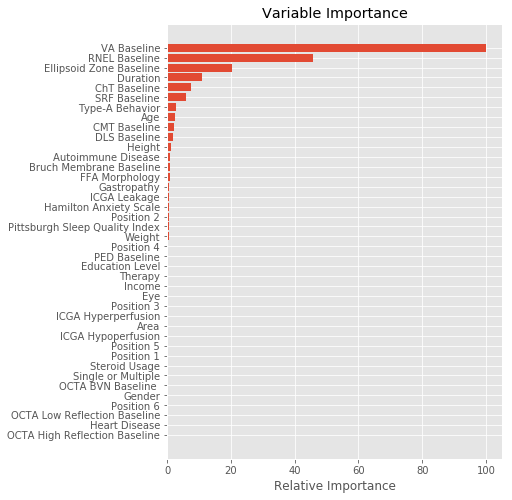

In [7]:
adab = AdaBoostRegressor(learning_rate=0.5, n_estimators=50, random_state=0)
adab_pred = []
adab_mae = []
adab_rmse = []
adab_FI = 0

for i in range(folds):
    adab.fit(X[i], y[i])
    adab_pred0 = adab.predict(test_X[i])
    adab_pred1 = np.expm1(adab_pred0)
    adab_pred.append(adab_pred1)
    
    MAE, RMSE = Print_MAE_RMSE(test_y[i], adab_pred1)
    adab_mae.append(MAE)
    adab_rmse.append(RMSE)
    
    adab_FI += adab.feature_importances_

print('-'*10)
print('MAE_mean = {:.4f}' .format(np.mean(adab_mae)))
print('RMSE_mean = {:.4f}' .format(np.mean(adab_rmse)))

Plot_Feature_Importance(adab_FI)

### Gradient Boosting Regressor

MAE = 0.0692
RMSE = 0.0877
MAE = 0.0803
RMSE = 0.1092
MAE = 0.0546
RMSE = 0.0817
MAE = 0.0639
RMSE = 0.0973
MAE = 0.0622
RMSE = 0.0841
MAE = 0.0636
RMSE = 0.0930
MAE = 0.0543
RMSE = 0.0859
MAE = 0.0593
RMSE = 0.0803
MAE = 0.0537
RMSE = 0.0755
MAE = 0.0477
RMSE = 0.0655
----------
MAE_mean = 0.0609
RMSE_mean = 0.0860


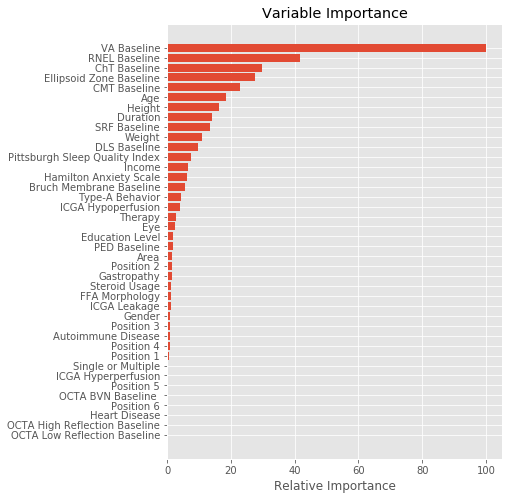

In [8]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, random_state=0)
gbr_pred = []
gbr_mae = []
gbr_rmse = []
gbr_FI = 0

for i in range(folds):
    gbr.fit(X[i], y[i])
    gbr_pred0 = gbr.predict(test_X[i])
    gbr_pred1 = np.expm1(gbr_pred0)
    gbr_pred.append(gbr_pred1)
    
    MAE, RMSE = Print_MAE_RMSE(test_y[i], gbr_pred1)
    gbr_mae.append(MAE)
    gbr_rmse.append(RMSE)
    
    gbr_FI += gbr.feature_importances_

print('-'*10)
print('MAE_mean = {:.4f}' .format(np.mean(gbr_mae)))
print('RMSE_mean = {:.4f}' .format(np.mean(gbr_rmse)))

Plot_Feature_Importance(gbr_FI)

### XGBoost Regressor

MAE = 0.0640
RMSE = 0.0824
MAE = 0.0763
RMSE = 0.1060
MAE = 0.0589
RMSE = 0.0788
MAE = 0.0698
RMSE = 0.1006
MAE = 0.0659
RMSE = 0.0993
MAE = 0.0617
RMSE = 0.0859
MAE = 0.0569
RMSE = 0.0867
MAE = 0.0666
RMSE = 0.0849
MAE = 0.0563
RMSE = 0.0734
MAE = 0.0542
RMSE = 0.0697
----------
MAE_mean = 0.0631
RMSE_mean = 0.0868


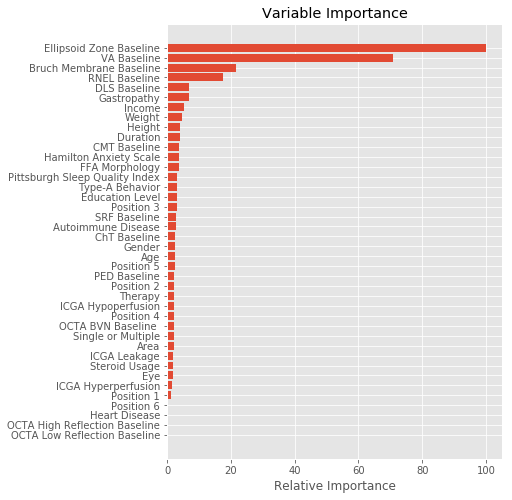

In [9]:
XGb = XGBRegressor(learning_rate=0.1,
                    n_estimators=500,
                    max_depth=9,
                    min_child_weight=3,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.7,
                    objective='reg:squarederror',
                    reg_alpha=0,
                    reg_lambda=1,
                    seed=0)
XGb_pred = []
XGb_mae = []
XGb_rmse = []
XGb_FI = 0

for i in range(folds):
    XGb.fit(X[i], y[i])
    XGb_pred0 = XGb.predict(test_X[i])
    XGb_pred1 = np.expm1(XGb_pred0)
    XGb_pred.append(XGb_pred1)
    
    MAE, RMSE = Print_MAE_RMSE(test_y[i], XGb_pred1)
    XGb_mae.append(MAE)
    XGb_rmse.append(RMSE)
    
    XGb_FI += XGb.feature_importances_

print('-'*10)
print('MAE_mean = {:.4f}' .format(np.mean(XGb_mae)))
print('RMSE_mean = {:.4f}' .format(np.mean(XGb_rmse)))

Plot_Feature_Importance(XGb_FI)

### Random Forest Regressor

MAE = 0.0618
RMSE = 0.0833
MAE = 0.0750
RMSE = 0.1041
MAE = 0.0634
RMSE = 0.1006
MAE = 0.0638
RMSE = 0.1002
MAE = 0.0660
RMSE = 0.1049
MAE = 0.0624
RMSE = 0.0968
MAE = 0.0489
RMSE = 0.0627
MAE = 0.0640
RMSE = 0.0843
MAE = 0.0498
RMSE = 0.0642
MAE = 0.0521
RMSE = 0.0660
----------
MAE_mean = 0.0607
RMSE_mean = 0.0867


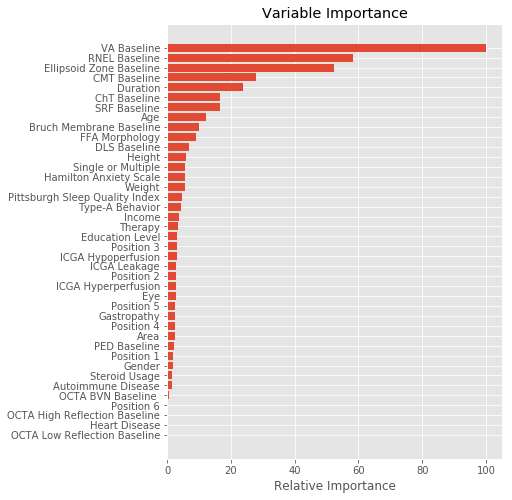

In [10]:
rf = RandomForestRegressor(bootstrap=True,
                           criterion='mse',
                           max_depth=80,
                           max_features='sqrt',
                           min_samples_leaf=1,
                           min_samples_split=2,
                           n_estimators=500,
                           n_jobs=1,
                           random_state=0)
rf_pred = []
rf_mae = []
rf_rmse = []
rf_FI = 0

for i in range(folds):
    rf.fit(X[i], y[i])
    rf_pred0 = rf.predict(test_X[i])
    rf_pred1 = np.expm1(rf_pred0)
    rf_pred.append(rf_pred1)
    
    MAE, RMSE = Print_MAE_RMSE(test_y[i], rf_pred1)
    rf_mae.append(MAE)
    rf_rmse.append(RMSE)
    
    rf_FI += rf.feature_importances_

print('-'*10)
print('MAE_mean = {:.4f}' .format(np.mean(rf_mae)))
print('RMSE_mean = {:.4f}' .format(np.mean(rf_rmse)))

Plot_Feature_Importance(rf_FI)

### Extra Trees Regressor

MAE = 0.0648
RMSE = 0.0875
MAE = 0.0764
RMSE = 0.1047
MAE = 0.0697
RMSE = 0.1100
MAE = 0.0683
RMSE = 0.1099
MAE = 0.0718
RMSE = 0.1051
MAE = 0.0661
RMSE = 0.1076
MAE = 0.0537
RMSE = 0.0669
MAE = 0.0666
RMSE = 0.0872
MAE = 0.0569
RMSE = 0.0778
MAE = 0.0636
RMSE = 0.0793
----------
MAE_mean = 0.0658
RMSE_mean = 0.0936


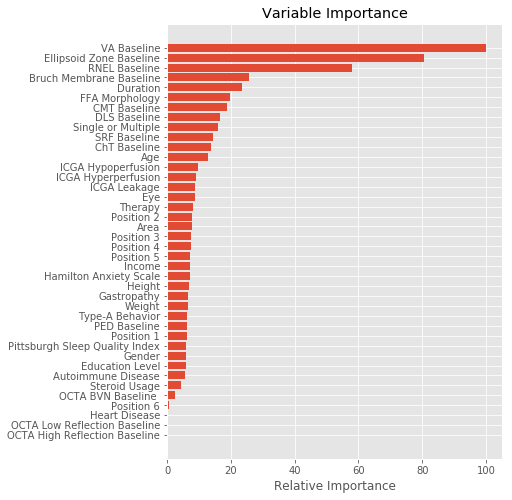

In [11]:
et = ExtraTreesRegressor(bootstrap=True,
                           criterion='mse',
                           max_depth=80,
                           max_features='sqrt',
                           min_samples_leaf=1,
                           min_samples_split=2,
                           n_estimators=500,
                           n_jobs=1,
                           random_state=0)
et_pred = []
et_mae = []
et_rmse = []
et_FI = 0

for i in range(folds):
    et.fit(X[i], y[i])
    et_pred0 = et.predict(test_X[i])
    et_pred1 = np.expm1(et_pred0)
    et_pred.append(et_pred1)
    
    MAE, RMSE = Print_MAE_RMSE(test_y[i], et_pred1)
    et_mae.append(MAE)
    et_rmse.append(RMSE)
    
    et_FI += et.feature_importances_

print('-'*10)
print('MAE_mean = {:.4f}' .format(np.mean(et_mae)))
print('RMSE_mean = {:.4f}' .format(np.mean(et_rmse)))

Plot_Feature_Importance(et_FI)

### Ensemble

In [12]:
methods = ['lasso', 'adab', 'gbr', 'XGb', 'rf', 'et']
pred_all = [lasso_pred, adab_pred, gbr_pred, XGb_pred, rf_pred, et_pred]
MAE_all = [lasso_mae, adab_mae, gbr_mae, XGb_mae, rf_mae, et_mae]
RMSE_all = [lasso_rmse, adab_rmse, gbr_rmse, XGb_rmse, rf_rmse, et_rmse]
MAE_mean = []
ensemble3_mae = []
ensemble3_rmse = []

for mae in MAE_all:
    MAE_mean.append(np.mean(mae))
    
sort_index = np.argsort(MAE_mean)
pred_3 = np.array([pred_all[idx] for idx in sort_index[:3]])
pred_ensemble3 = np.mean(pred_3, axis=0)

for i in range(folds):
    MAE, RMSE = Print_MAE_RMSE(test_y[i], pred_ensemble3[i])
    ensemble3_mae.append(MAE)
    ensemble3_rmse.append(RMSE)
    
print('-'*20)
print('Best 3 methods: {}' .format([methods[idx] for idx in sort_index[:3]]))
print('Ensemble best 3 methods, MAE_mean = {:.4f}' .format(np.mean(ensemble3_mae)))
print('Ensemble best 3 methods, RMSE_mean = {:.4f}' .format(np.mean(ensemble3_rmse)))

MAE = 0.0613
RMSE = 0.0787
MAE = 0.0747
RMSE = 0.1026
MAE = 0.0582
RMSE = 0.0900
MAE = 0.0571
RMSE = 0.0906
MAE = 0.0620
RMSE = 0.0890
MAE = 0.0621
RMSE = 0.0930
MAE = 0.0463
RMSE = 0.0622
MAE = 0.0586
RMSE = 0.0780
MAE = 0.0480
RMSE = 0.0627
MAE = 0.0447
RMSE = 0.0572
--------------------
Best 3 methods: ['lasso', 'rf', 'gbr']
Ensemble best 3 methods, MAE_mean = 0.0573
Ensemble best 3 methods, RMSE_mean = 0.0804


### STD for MAE and RMSE of each fold in Cross Validation

In [13]:
methods = ['lasso', 'adab', 'gbr', 'XGb', 'rf', 'et', 'ensemble3']
MAE_all = [lasso_mae, adab_mae, gbr_mae, XGb_mae, rf_mae, et_mae, ensemble3_mae]
RMSE_all = [lasso_rmse, adab_rmse, gbr_rmse, XGb_rmse, rf_rmse, et_rmse, ensemble3_rmse]

print('-'*10, 'MAE_std', '-'*10)
for i, mae1 in enumerate(MAE_all):
    print('{}:\tstd = {:.4f}' .format(methods[i], np.std(mae1)))

print('-'*10, 'RMSE_std', '-'*10)
for i, rmse1 in enumerate(RMSE_all):
    print('{}:\tstd = {:.4f}' .format(methods[i], np.std(rmse1)))

---------- MAE_std ----------
lasso:	std = 0.0105
adab:	std = 0.0107
gbr:	std = 0.0088
XGb:	std = 0.0065
rf:	std = 0.0077
et:	std = 0.0063
ensemble3:	std = 0.0086
---------- RMSE_std ----------
lasso:	std = 0.0154
adab:	std = 0.0134
gbr:	std = 0.0114
XGb:	std = 0.0113
rf:	std = 0.0163
et:	std = 0.0149
ensemble3:	std = 0.0145


### Featrue Importance Map

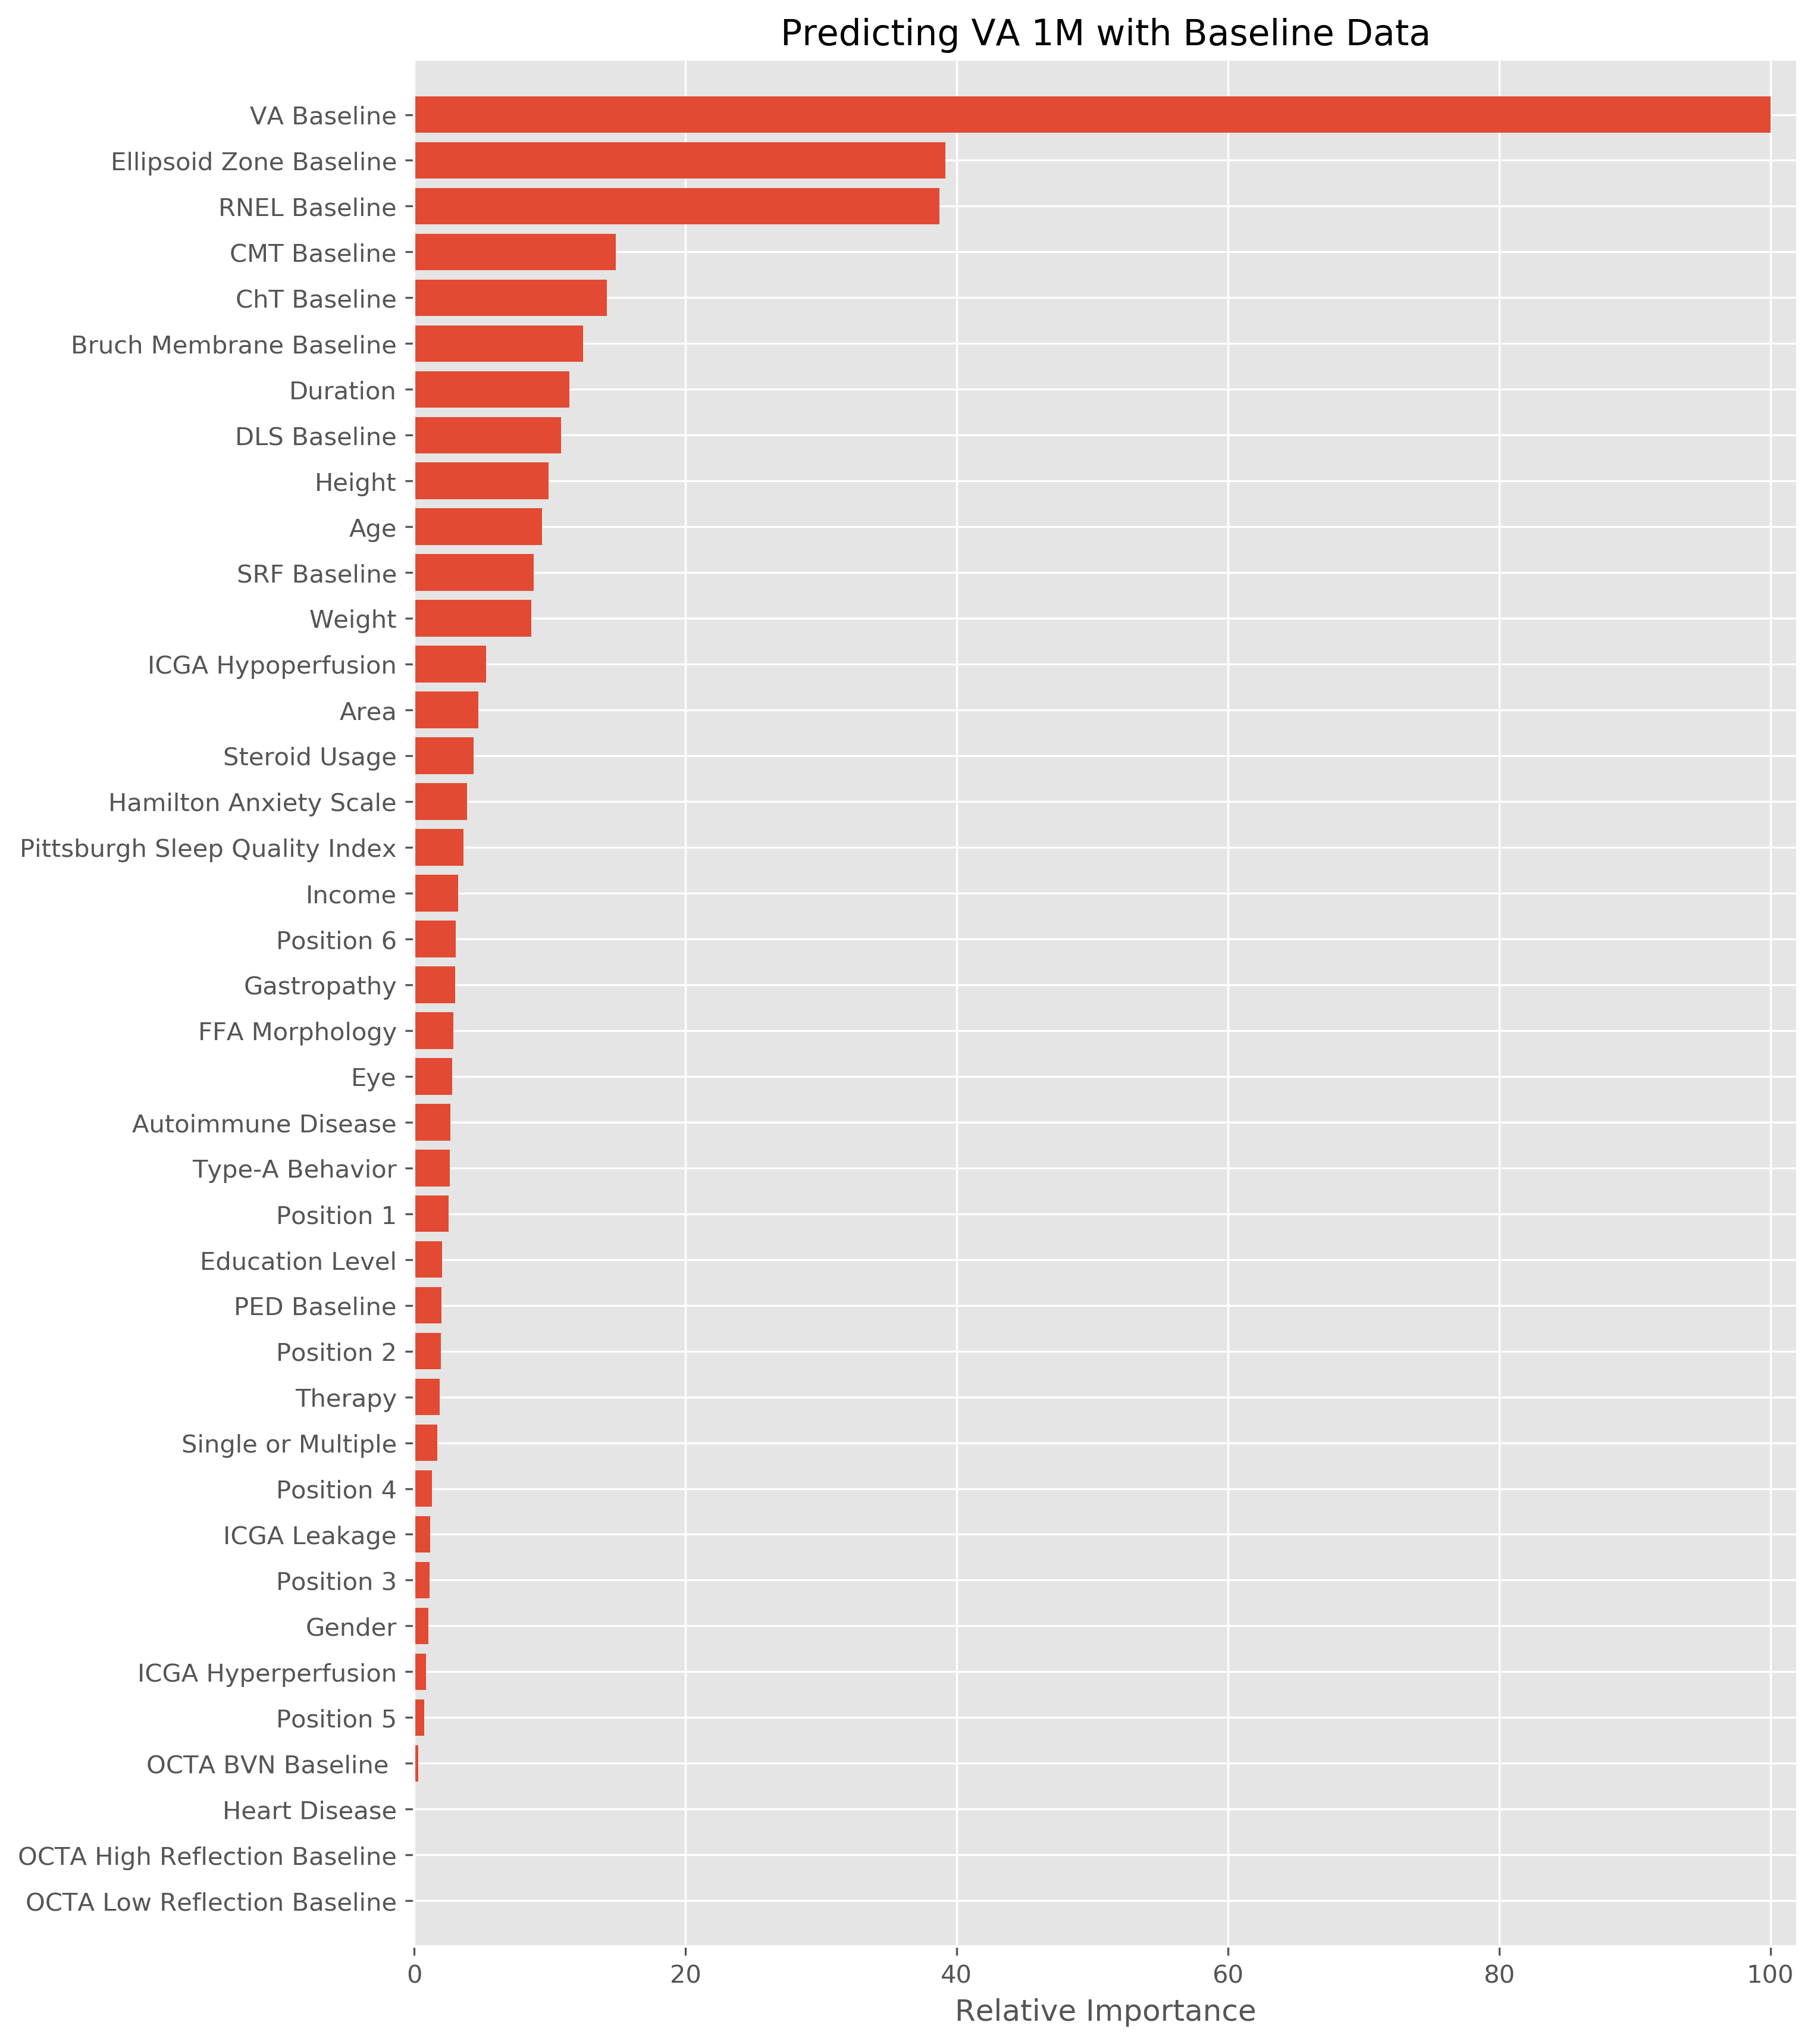

In [14]:
methods_FI = [lasso_FI, adab_FI, gbr_FI, XGb_FI, rf_FI, et_FI]

choosed_FI = np.array([methods_FI[idx] for idx in sort_index[:3]])
feature_importance = np.mean(choosed_FI, axis=0)

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(10, 14))
plt.xlim([0, 102])
plt.ylim([-1, pos[-1]+1.2])
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X[0].columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Predicting VA 1M with Baseline Data')
plt.savefig('VA_FI_1_b.png', dpi=300, bbox_inches = 'tight')
plt.show()

### Prediction results

In [15]:
best_fold = np.argsort(ensemble3_mae)[0];
pred_best_fold = np.mean(pred_3[:,best_fold], axis=0)

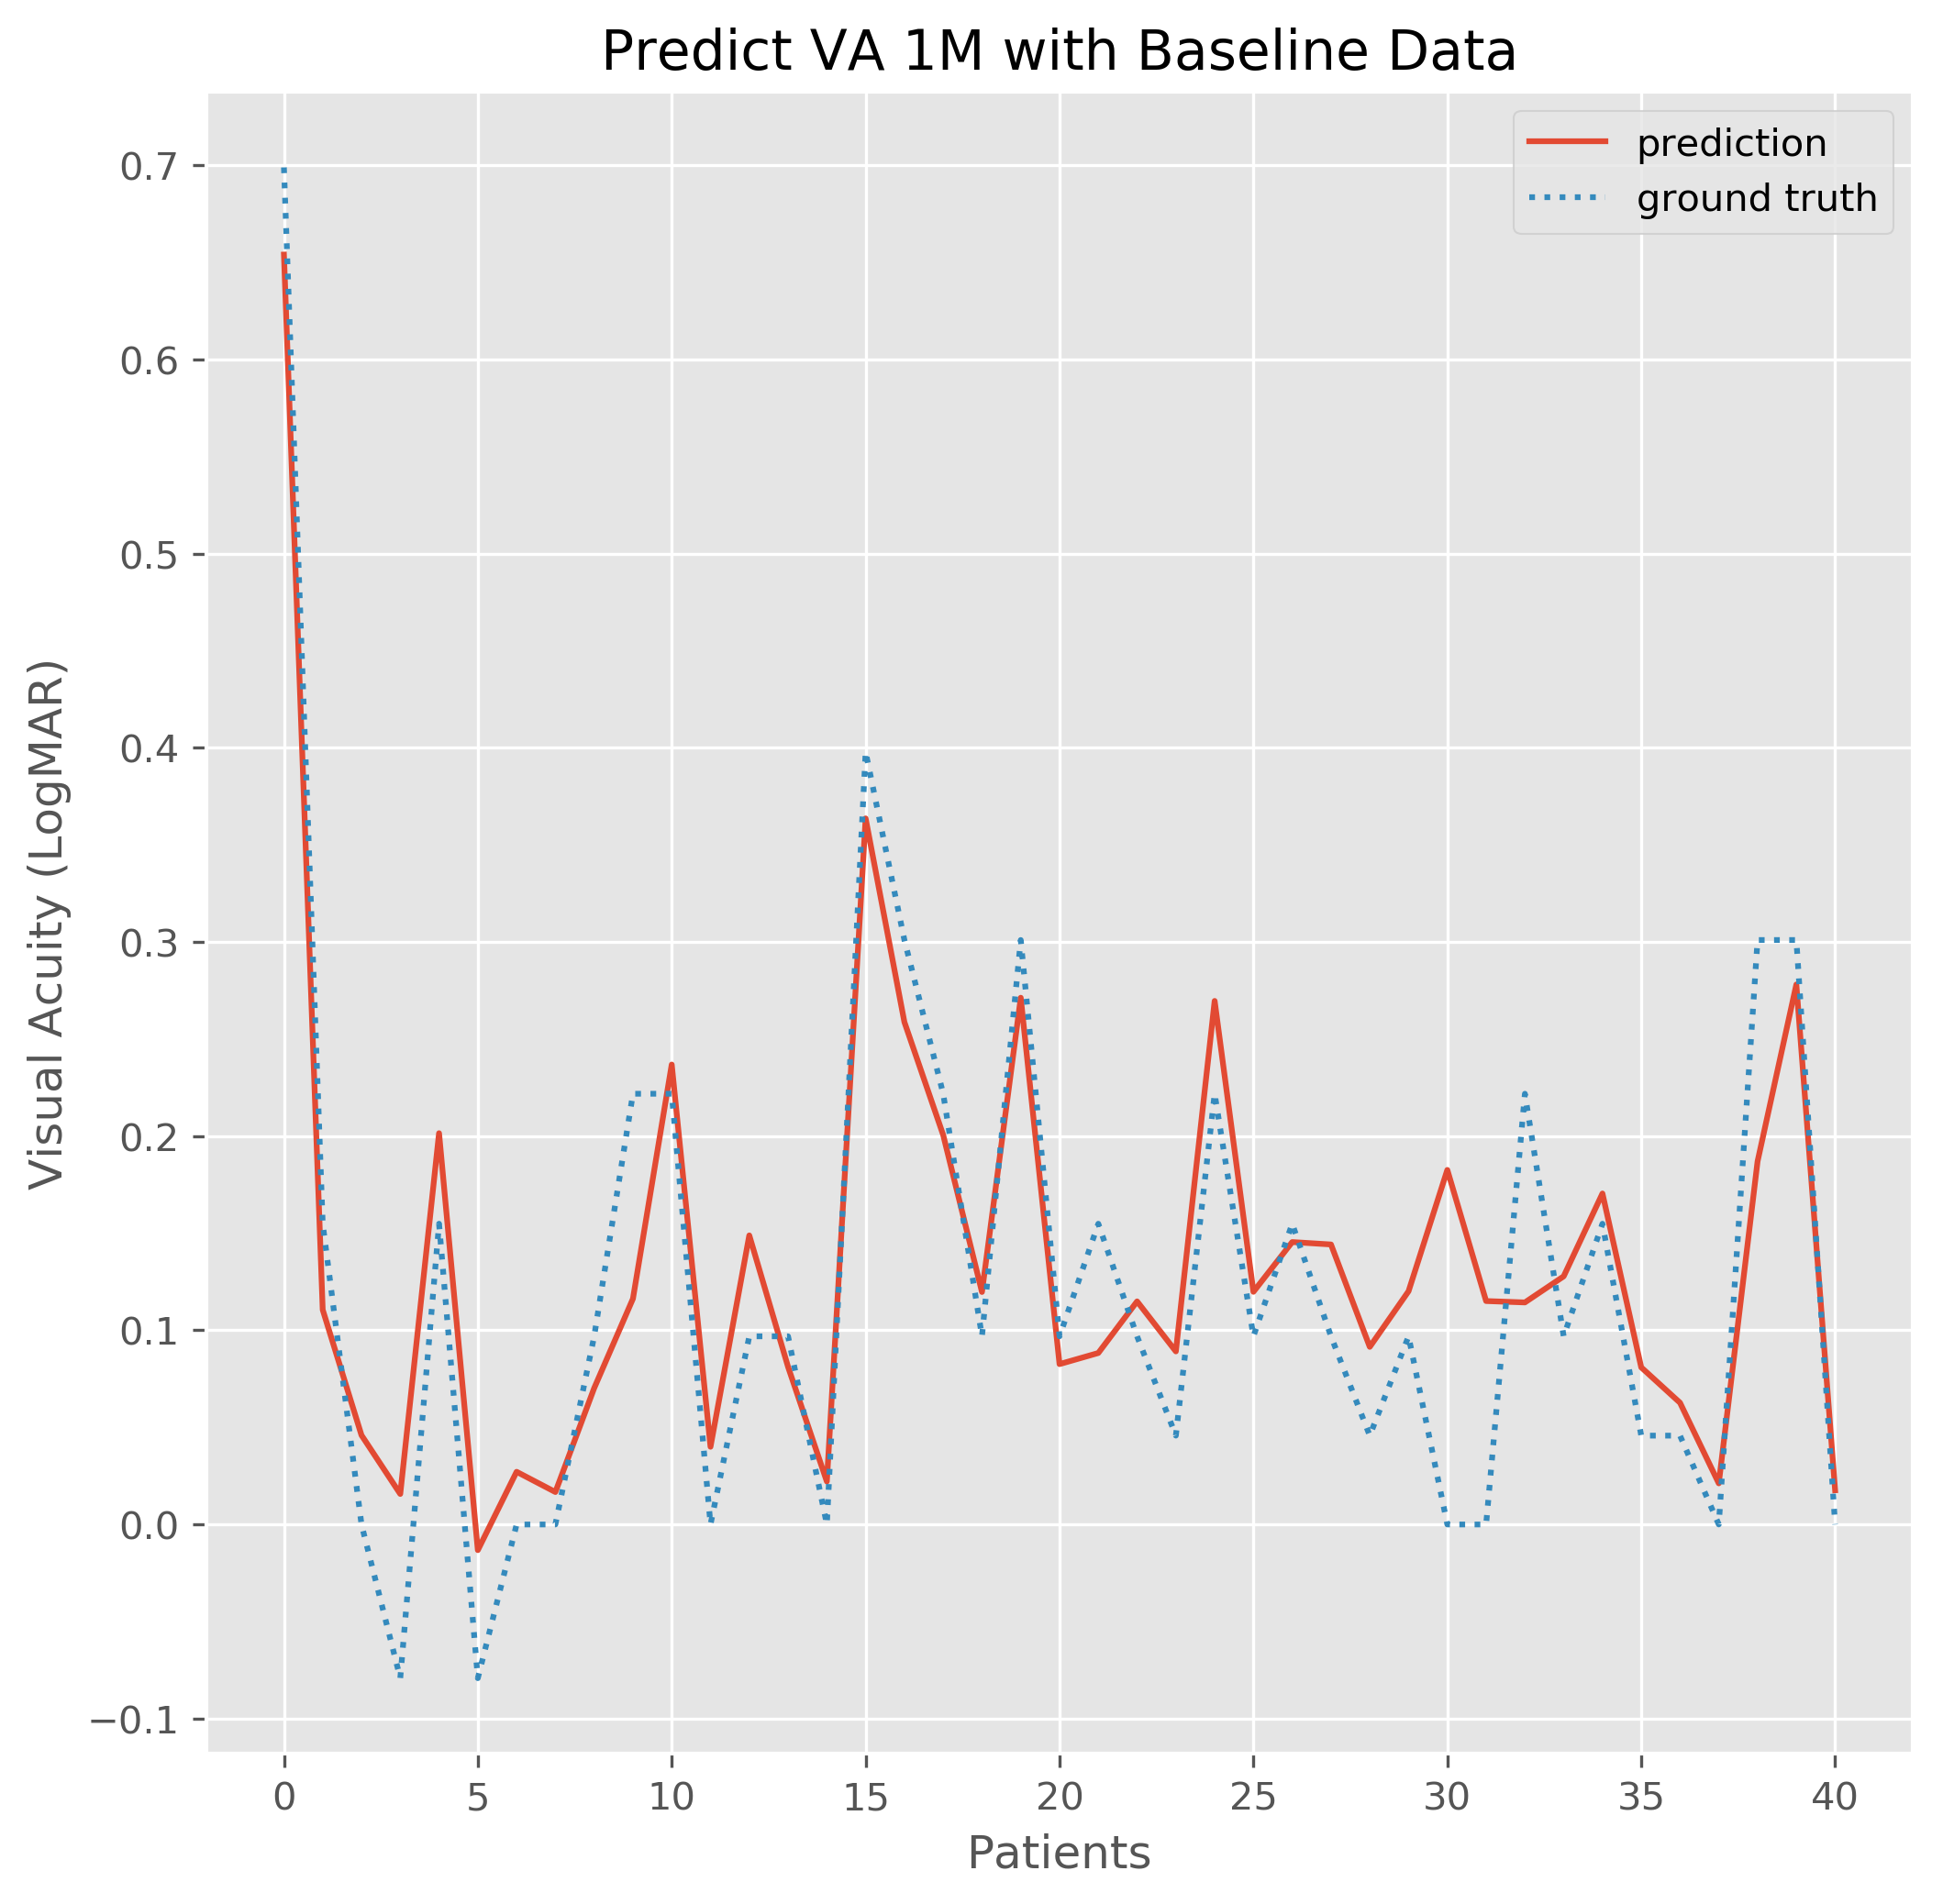

In [16]:
axis_x = [x for x in range(len(test_y[best_fold]))]

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(8, 8))
plt.plot(axis_x, pred_best_fold, label="prediction")
plt.plot(axis_x, test_y[best_fold], label="ground truth",linestyle=":")

plt.xlabel('Patients')
plt.ylabel('Visual Acuity (LogMAR)')
plt.title('Predict VA 1M with Baseline Data')
plt.legend()
plt.savefig('VA_cv_1_b.png', dpi=300, bbox_inches = 'tight')
plt.show()

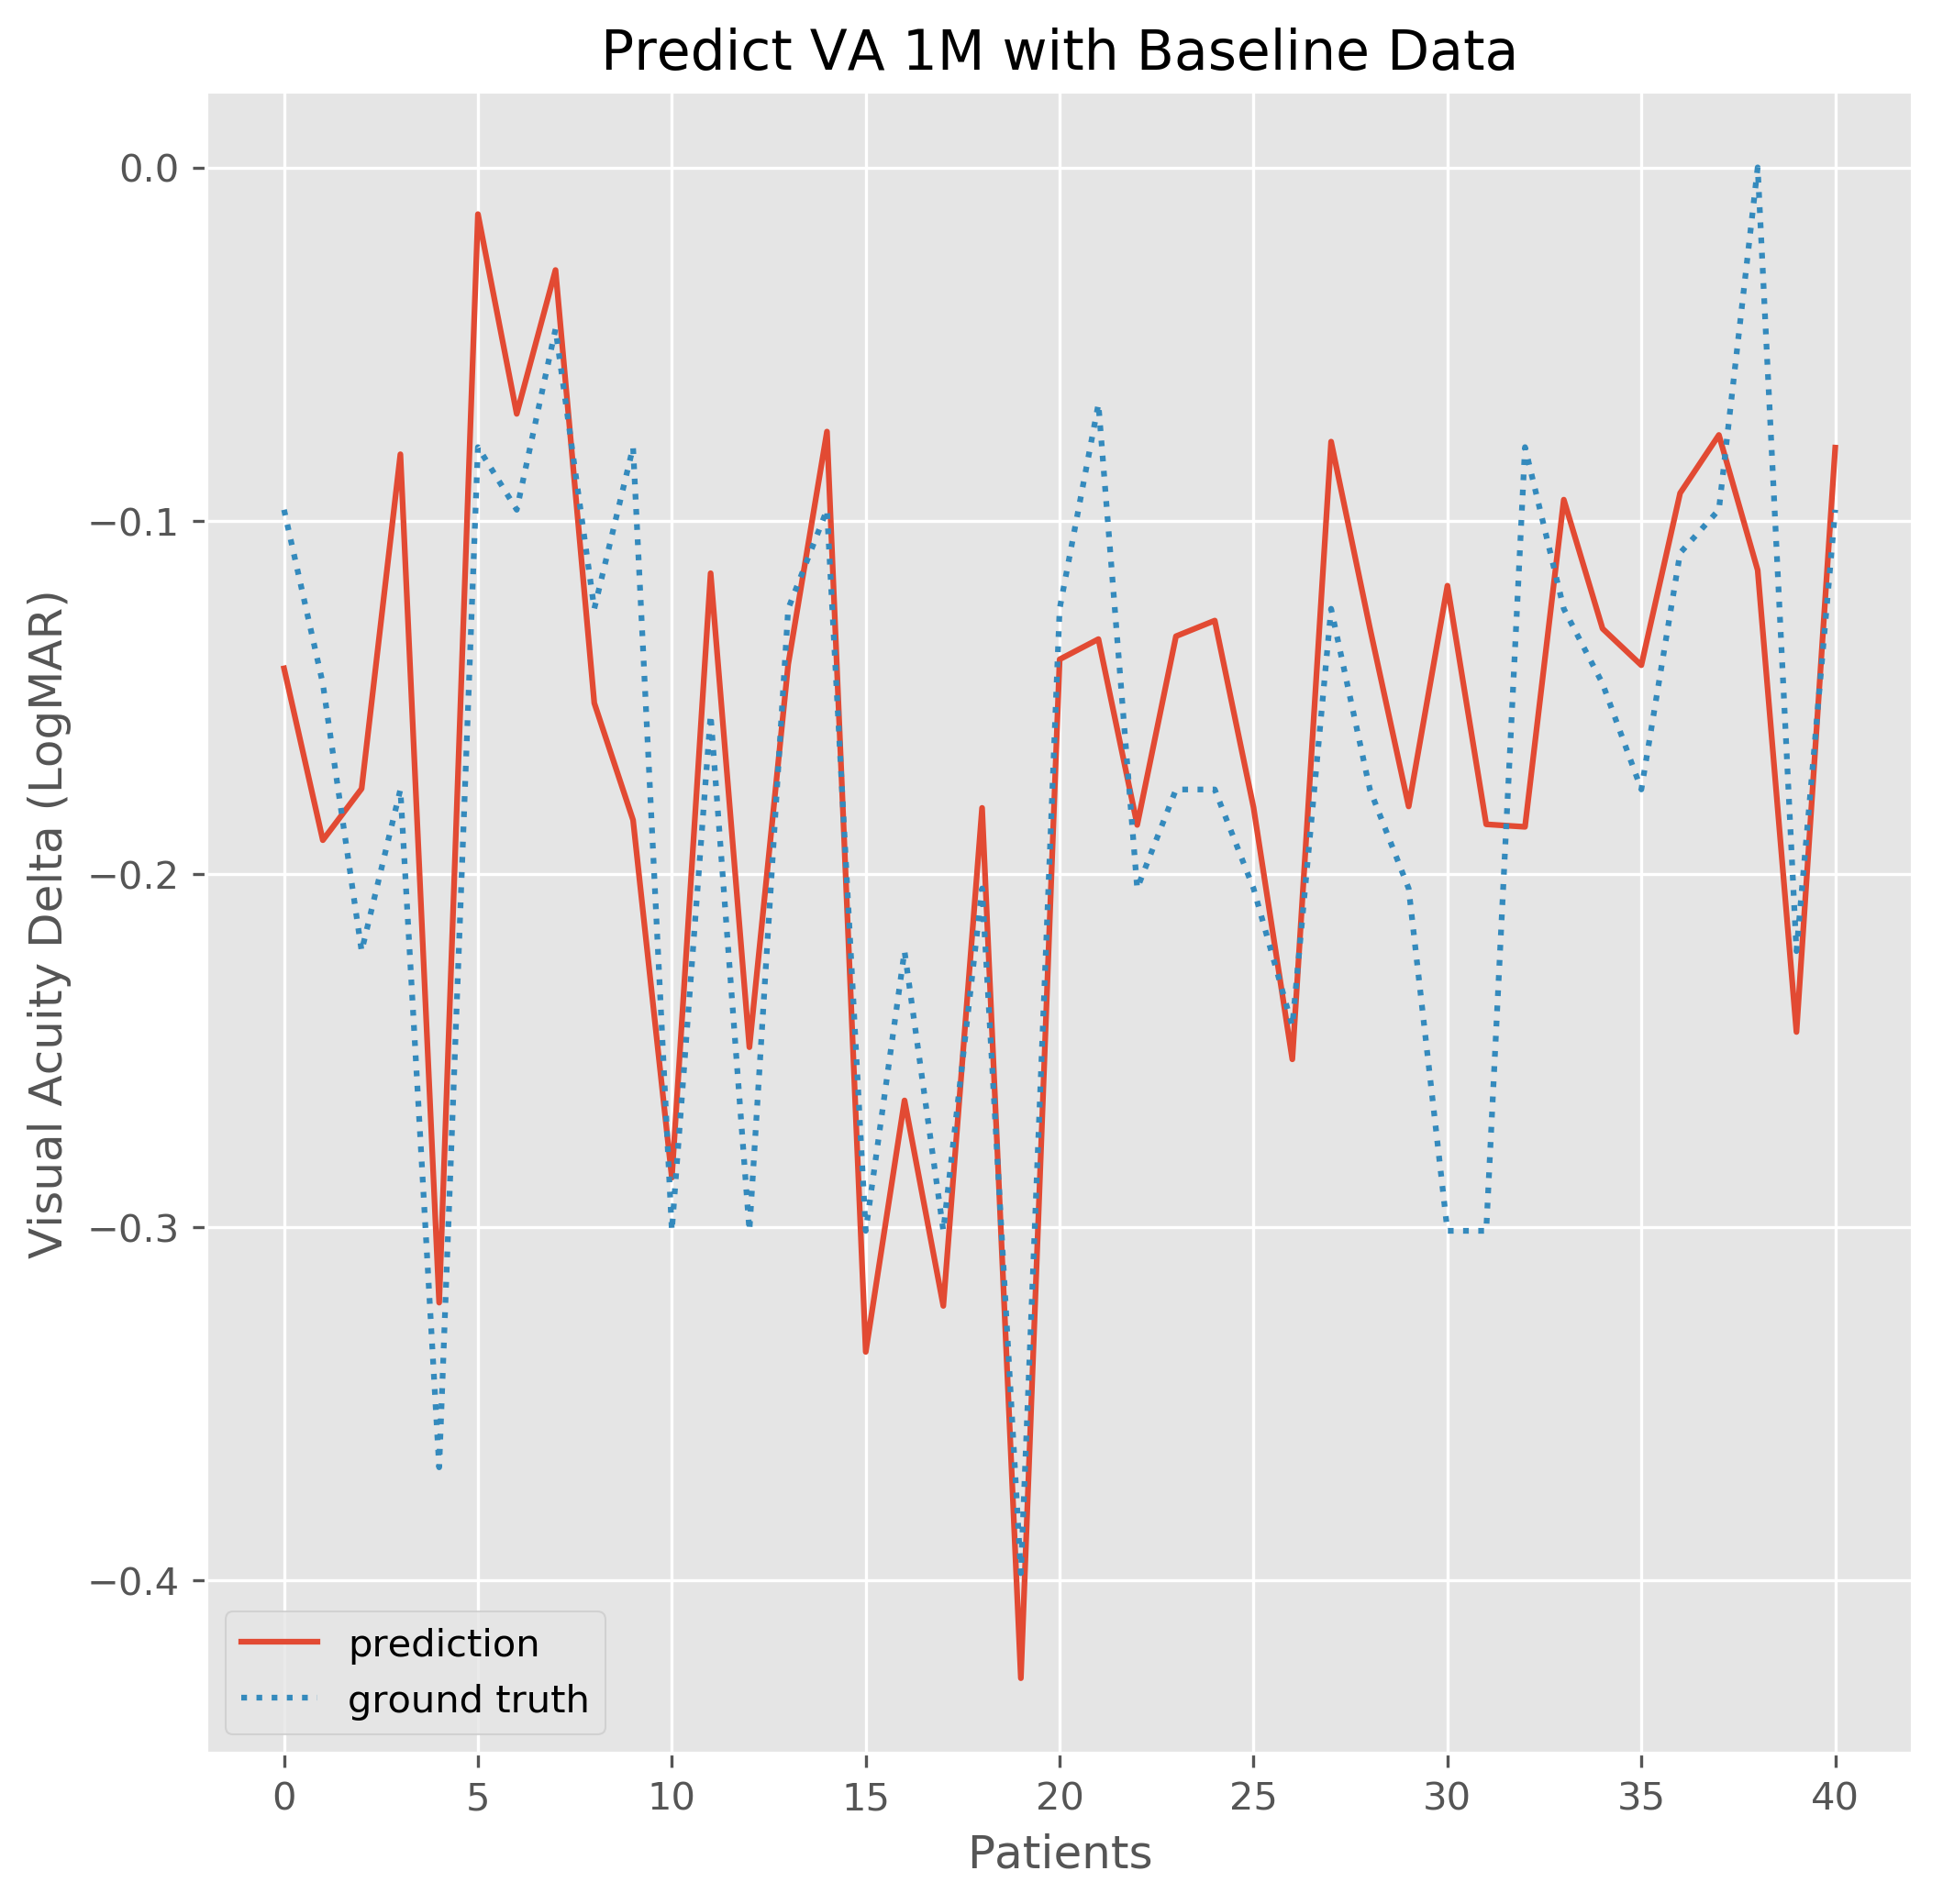

In [17]:
axis_x = [x for x in range(len(test_y[best_fold]))]

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

VA_baseline = np.expm1(test_X[best_fold]['VA Baseline'])

plt.figure(figsize=(8, 8))
plt.plot(axis_x, pred_best_fold - VA_baseline, label="prediction")
plt.plot(axis_x, test_y[best_fold] - VA_baseline, label="ground truth",linestyle=":")

plt.xlabel('Patients')
plt.ylabel('Visual Acuity Delta (LogMAR)')
plt.title('Predict VA 1M with Baseline Data')
plt.legend()
plt.savefig('VA_cv_1_b_delta.png', dpi=300, bbox_inches = 'tight')
plt.show()

# External validation

### MAE and RMSE

In [18]:
estimators = [lasso, adab, gbr, XGb, rf, et]
estimator_list = [estimators[idx] for idx in sort_index[:3]]
valid_pred = []

for estimator in estimator_list:
    estimator.fit(X_all, y_all)
    valid_pred.append(np.expm1(estimator.predict(valid_X)))
    
valid_pred_ensemble3 = np.mean(np.array(valid_pred), axis=0)
Print_MAE_RMSE(valid_y, valid_pred_ensemble3);

MAE = 0.0685
RMSE = 0.0897


### Prediction results

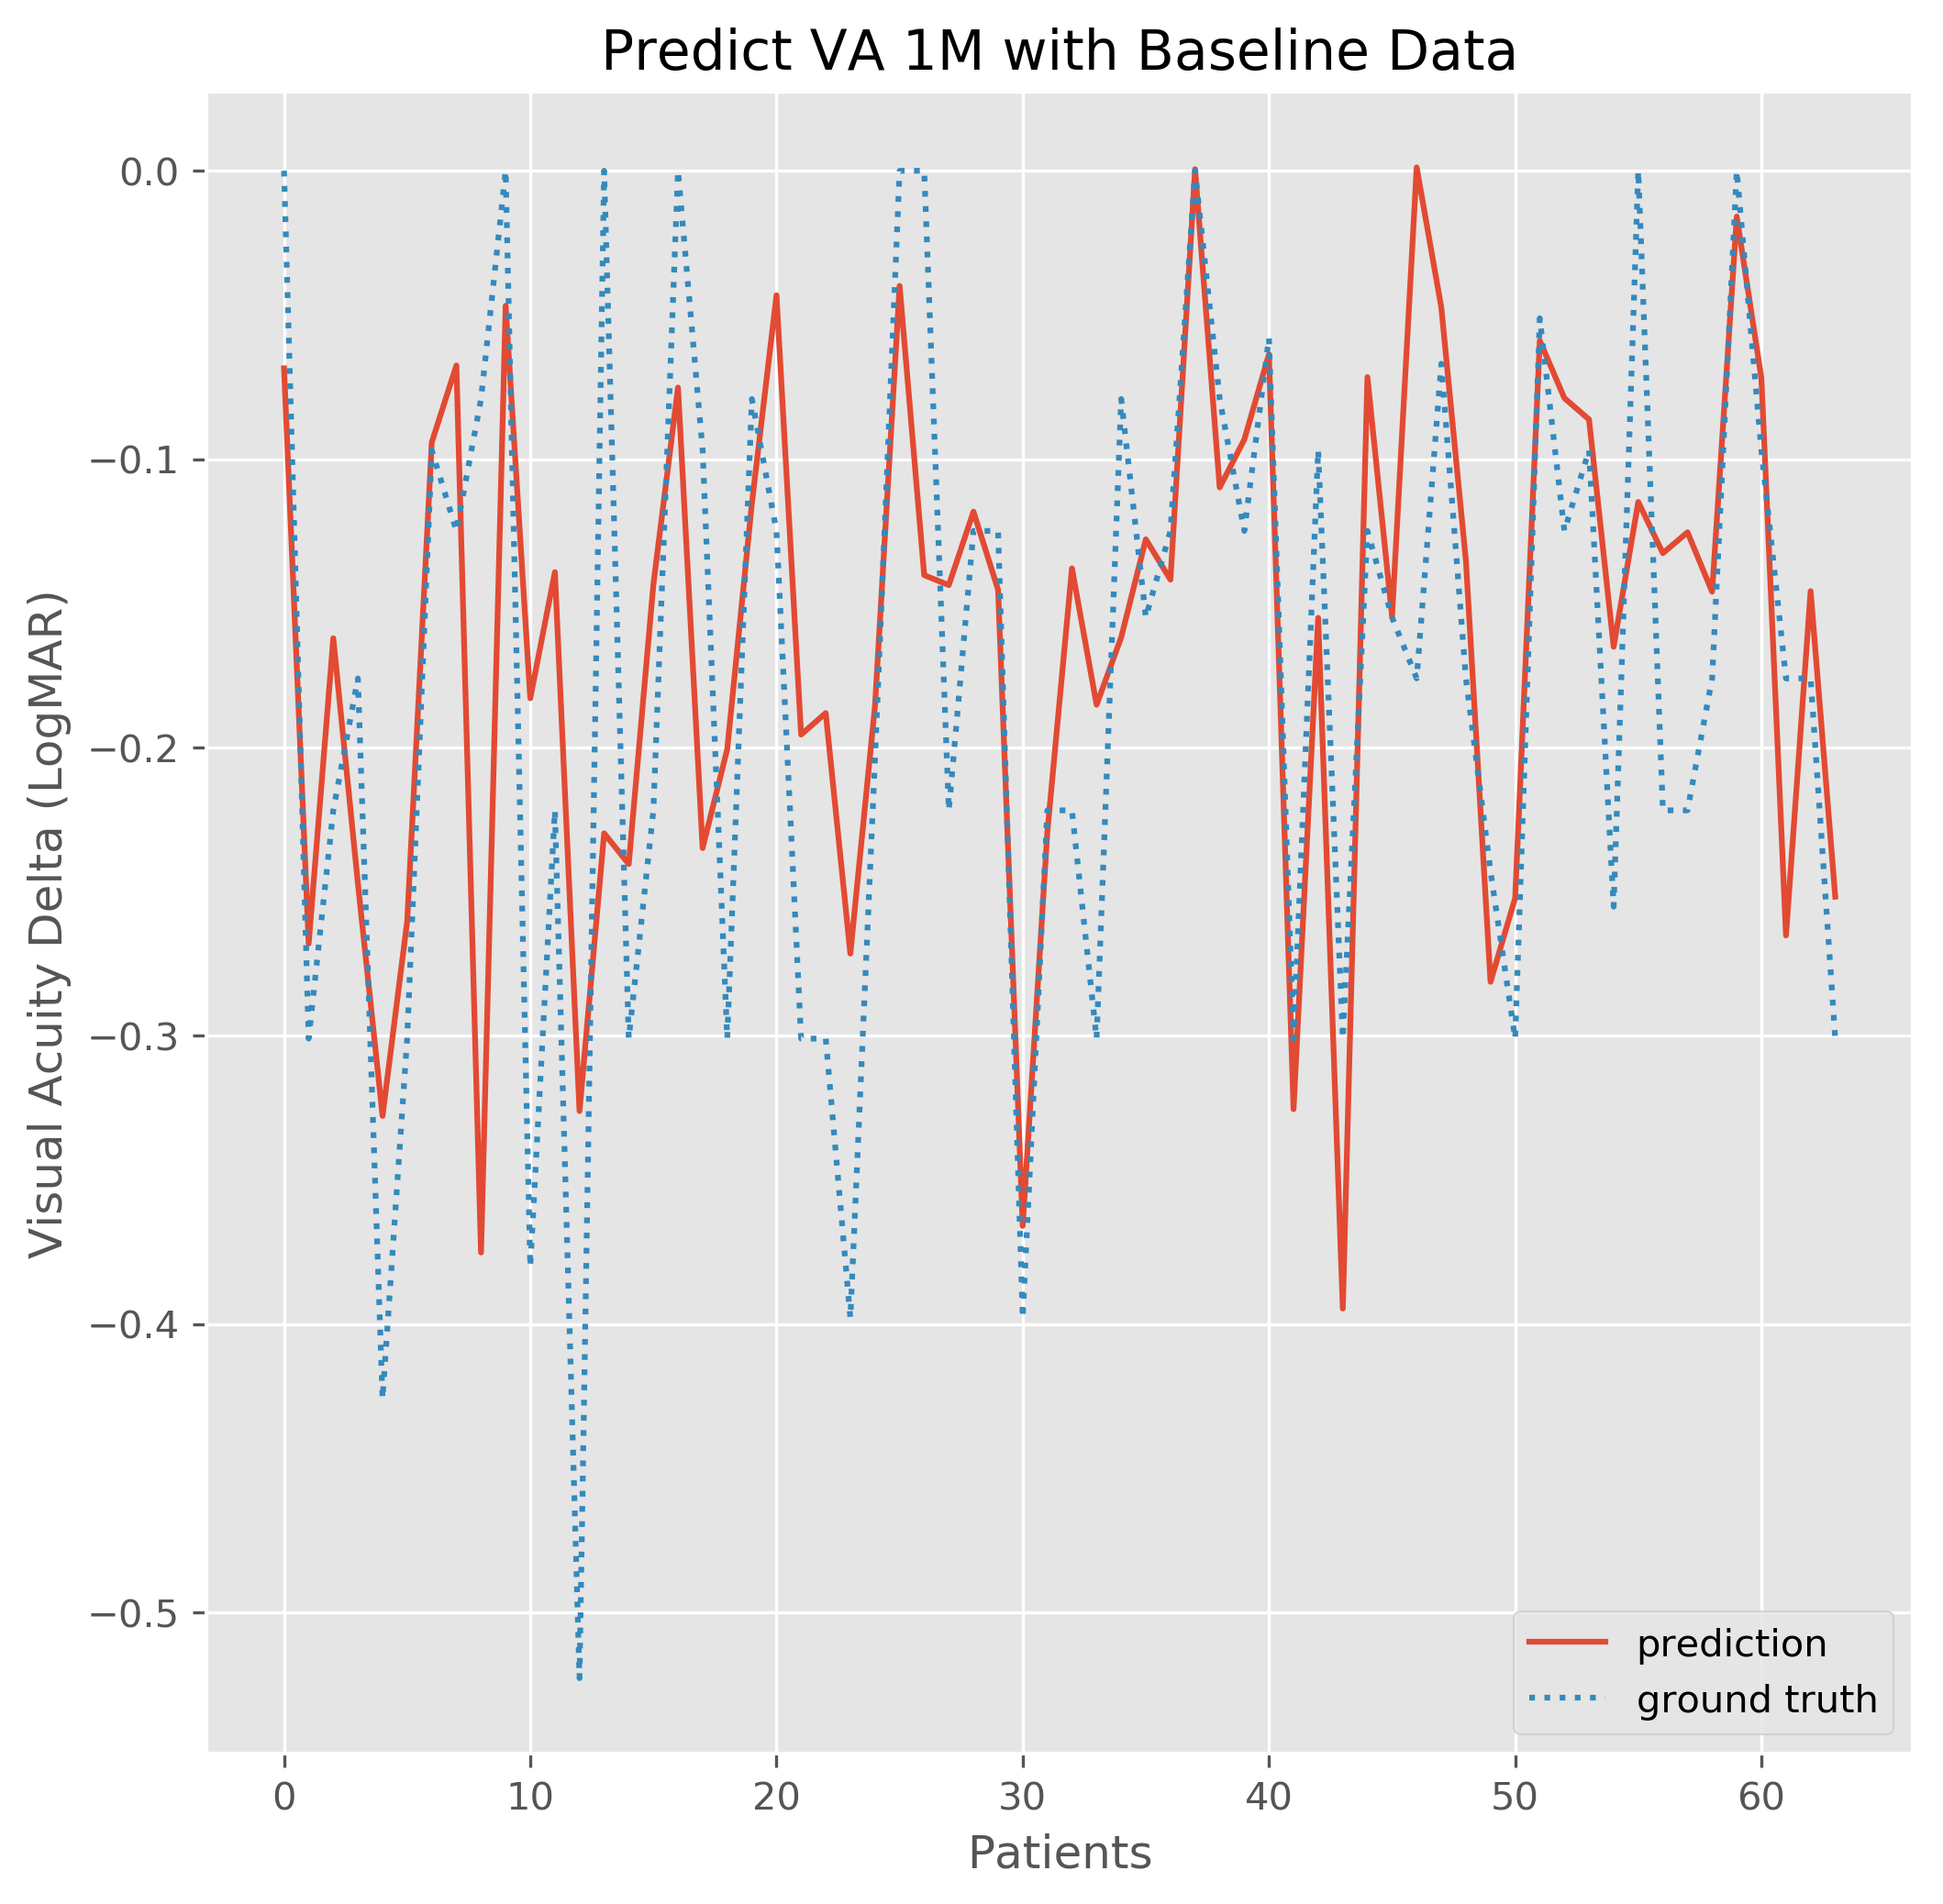

In [19]:
axis_x = [x for x in range(len(valid_y))]

# plt.rcParams['savefig.dpi'] = 300
# plt.rcParams['figure.dpi'] = 300
VA_baseline = np.expm1(valid_X['VA Baseline'])

plt.figure(figsize=(8, 8))
plt.plot(axis_x, valid_pred_ensemble3 - VA_baseline, label="prediction")
plt.plot(axis_x, valid_y - VA_baseline, label="ground truth",linestyle=":")

plt.xlabel('Patients')
plt.ylabel('Visual Acuity Delta (LogMAR)')
plt.title('Predict VA 1M with Baseline Data')
plt.legend()
# plt.legend(loc="upper right")

plt.savefig('VA_valid_1_b_delta.png', dpi=300, bbox_inches = 'tight')
plt.show()

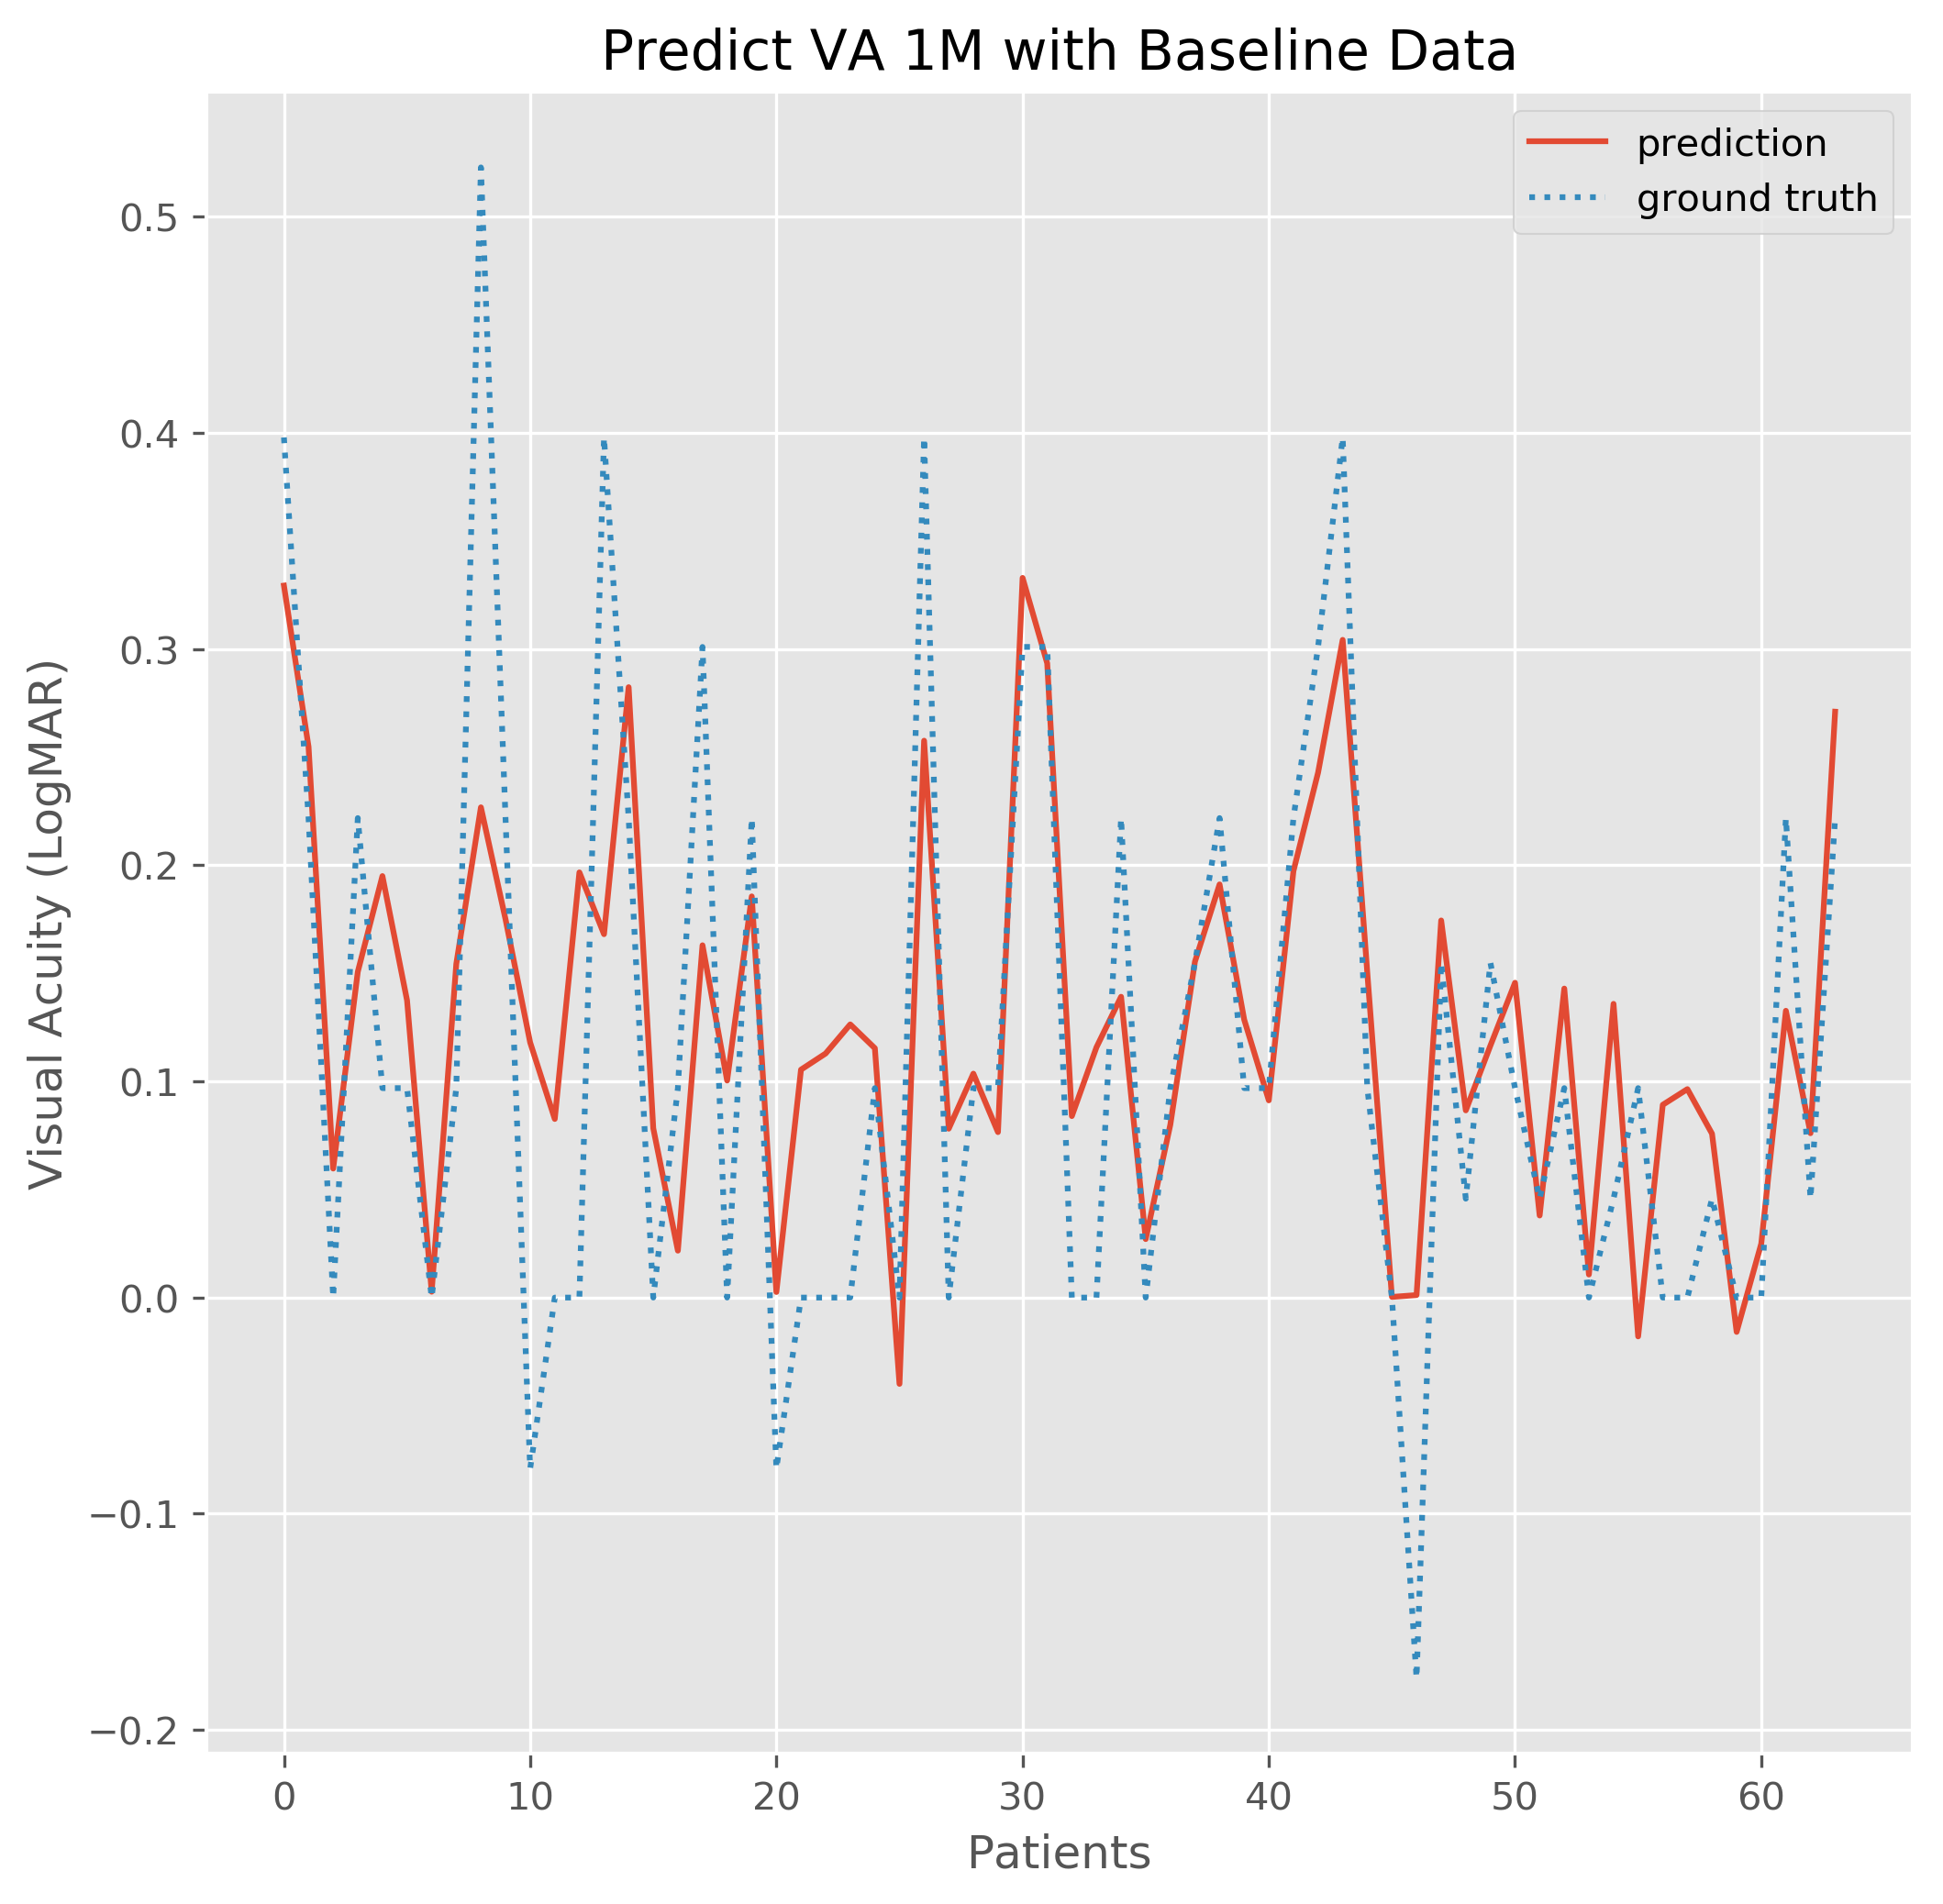

In [20]:
axis_x = [x for x in range(len(valid_y))]

# plt.rcParams['savefig.dpi'] = 300
# plt.rcParams['figure.dpi'] = 300
plt.figure(figsize=(8, 8))
plt.plot(axis_x, valid_pred_ensemble3, label="prediction")
plt.plot(axis_x, valid_y, label="ground truth",linestyle=":")

plt.xlabel('Patients')
plt.ylabel('Visual Acuity (LogMAR)')
plt.title('Predict VA 1M with Baseline Data')
# plt.legend(loc="upper right")
plt.legend()

plt.savefig('VA_valid_1_b.png', dpi=300, bbox_inches = 'tight')
plt.show()